<a href="https://colab.research.google.com/github/ActionPace/DeepLearningTests/blob/master/CholletTransferLearningKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://s3.amazonaws.com/machinelearningfiles/dogsandcats-train.zip

--2019-04-21 21:39:57--  https://s3.amazonaws.com/machinelearningfiles/dogsandcats-train.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.102.149
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.102.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 569546721 (543M) [application/zip]
Saving to: ‘dogsandcats-train.zip’

dogsandcats-train.z 100%[===================>] 543.16M  66.2MB/s    in 9.5s    

2019-04-21 21:40:07 (56.9 MB/s) - ‘dogsandcats-train.zip’ saved [569546721/569546721]



In [0]:

!unzip -q dogsandcats-train.zip

In [0]:
!rm dogsandcats-train.zip

In [0]:
import os, shutil

original_dataset_dir = './train'    

base_dir = './cats_and_dogs_small'                 
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')                                
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')                      
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')                                  
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')                           
os.mkdir(train_cats_dir)                                                   

train_dogs_dir = os.path.join(train_dir, 'dogs')                           
os.mkdir(train_dogs_dir)                                                   

validation_cats_dir = os.path.join(validation_dir, 'cats')                 
os.mkdir(validation_cats_dir)                                              

validation_dogs_dir = os.path.join(validation_dir, 'dogs')                 
os.mkdir(validation_dogs_dir)                                              

test_cats_dir = os.path.join(test_dir, 'cats')                             
os.mkdir(test_cats_dir)                                                    

test_dogs_dir = os.path.join(test_dir, 'dogs')                             
os.mkdir(test_dogs_dir)                                                    

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                       
    dst = os.path.join(train_cats_dir, fname)                              
    shutil.copyfile(src, dst)                                              

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_cats_dir, fname)                         
    shutil.copyfile(src, dst)                                              

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_cats_dir, fname)                               
    shutil.copyfile(src, dst)                                              

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_dogs_dir, fname)                              
    shutil.copyfile(src, dst)                                              
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_dogs_dir, fname)                         
    shutil.copyfile(src, dst)                                              

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_dogs_dir, fname)                               
    shutil.copyfile(src, dst)

In [0]:
!ls

cats_and_dogs_small  sample_data  train


In [0]:
!ls cats_and_dogs_small

test  train  validation


In [0]:

!ls ./cats_and_dogs_small/test

cats  dogs


In [0]:
!ls ./cats_and_dogs_small/train

cats  dogs


In [0]:
!ls ./cats_and_dogs_small/train/dogs | wc -l

1000


In [0]:
!ls ./cats_and_dogs_small/train/cats | wc -l

1000


In [0]:
!ls ./cats_and_dogs_small/test/dogs | wc -l

500


In [0]:
!ls ./cats_and_dogs_small/test/cats | wc -l

500


In [0]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [0]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 1s 0us/step


In [0]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = './cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break                                                           
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [0]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 755us/step - loss: 0.6426 - acc: 0.6215 - val_loss: 0.4666 - val_acc: 0.8190
Epoch 2/30
2000/2000 [==============================] - 1s 272us/step - loss: 0.4367 - acc: 0.7945 - val_loss: 0.3729 - val_acc: 0.8610
Epoch 3/30
2000/2000 [==============================] - 1s 264us/step - loss: 0.3770 - acc: 0.8340 - val_loss: 0.3264 - val_acc: 0.8840
Epoch 4/30
2000/2000 [==============================] - 1s 270us/step - loss: 0.3199 - acc: 0.8675 - val_loss: 0.3044 - val_acc: 0.8850
Epoch 5/30
2000/2000 [==============================] - 1s 265us/step - loss: 0.2934 - acc: 0.8800 - val_loss: 0.2885 - val_acc: 0.8880
Epoch 6/30
2000/2000 [==============================] - 1s 269us/step - loss: 0.2720 - acc: 0.8930 - val_loss

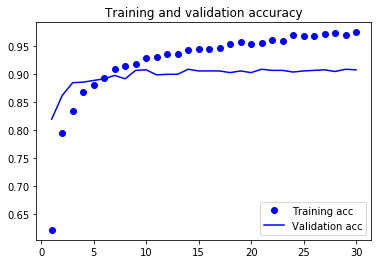

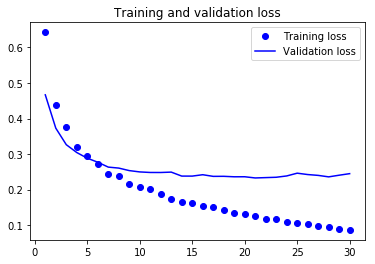

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

You reach a validation accuracy of about 90%—much better than you achieved in the previous section with the small model trained from scratch.

But the plots also indicate that you’re overfitting almost from the start—despite using dropout with a fairly large rate.

That’s because this technique doesn’t use data augmentation, which is essential for preventing overfitting with small image datasets.

##Feature extraction with data augmentation

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [0]:
print('This is the number of trainable weights '
         'before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
          'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)                

train_generator = train_datagen.flow_from_directory(
        train_dir,                                               
        target_size=(150, 150),                                  
        batch_size=20,
        class_mode='binary')                                     

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 19s 195ms/step - loss: 0.5931 - acc: 0.6950 - val_loss: 0.4527 - val_acc: 0.8320
Epoch 2/30
100/100 [==============================] - 18s 178ms/step - loss: 0.4800 - acc: 0.7865 - val_loss: 0.3640 - val_acc: 0.8710
Epoch 3/30
100/100 [==============================] - 18s 177ms/step - loss: 0.4350 - acc: 0.8070 - val_loss: 0.3379 - val_acc: 0.8640
Epoch 4/30
100/100 [==============================] - 18s 176ms/step - loss: 0.4085 - acc: 0.8170 - val_loss: 0.3037 - val_acc: 0.8920
Epoch 5/30
100/100 [==============================] - 19s 185ms/step - loss: 0.3858 - acc: 0.8250 - val_loss: 0.2922 - val_acc: 0.8890
Epoch 6/30
100/100 [==============================] - 18s 177ms/step - loss: 0.3699 - acc: 0.8385 - val_loss: 0.2850 - val_acc: 0.8810
Epoch 7/30
100/100 [==============================] - 18s 175ms/step - loss: 0.3561 - acc: 0.8420 - val_lo

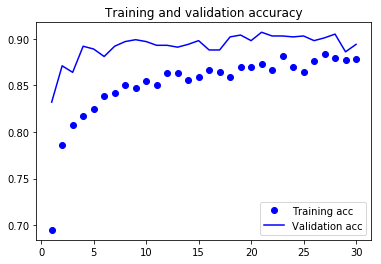

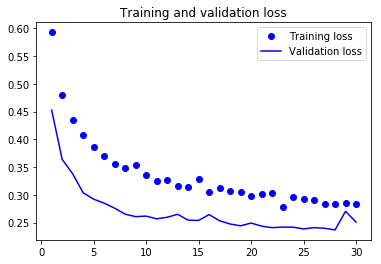

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


## Fine-tuning

In [0]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 20s 196ms/step - loss: 0.2816 - acc: 0.8830 - val_loss: 0.2511 - val_acc: 0.9000
Epoch 2/100
100/100 [==============================] - 19s 185ms/step - loss: 0.2541 - acc: 0.8910 - val_loss: 0.2022 - val_acc: 0.9230
Epoch 3/100
100/100 [==============================] - 19s 187ms/step - loss: 0.2421 - acc: 0.9005 - val_loss: 0.2030 - val_acc: 0.9160
Epoch 4/100
100/100 [==============================] - 18s 178ms/step - loss: 0.2230 - acc: 0.9120 - val_loss: 0.2272 - val_acc: 0.9180
Epoch 5/100
100/100 [==============================] - 19s 192ms/step - loss: 0.2001 - acc: 0.9155 - val_loss: 0.1781 - val_acc: 0.9260
Epoch 6/100
100/100 [==============================] - 18s 178ms/step - loss: 0.1850 - acc: 0.9275 - val_loss: 0.1911 - val_acc: 0.9290
Epoch 7/100
100/100 [==============================] - 18s 178ms/step - loss: 0.1861 - acc: 0.9190 - val_loss: 0.1945 - val_acc: 0.9330
Epoch 8/100
100/100 [===========================

In [0]:
model.save('cats_and_dogs_small_3.h5')

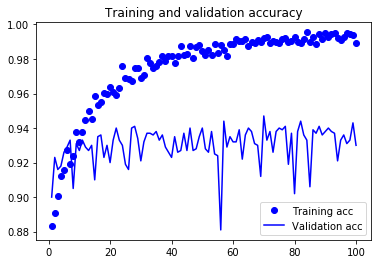

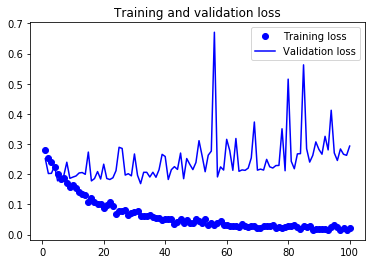

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


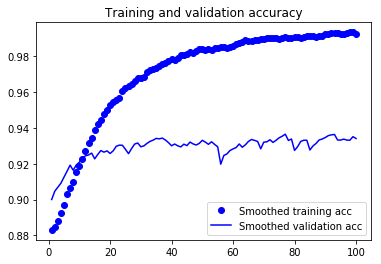

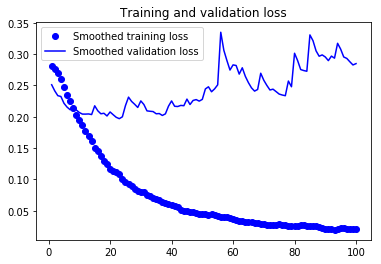

In [0]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The validation accuracy curve look much cleaner. You’re seeing a nice 1% absolute improvement in accuracy, from about 96% to above 97%.

Note that the loss curve doesn’t show any real improvement (in fact, it’s deteriorating).

You may wonder, how could accuracy stay stable or improve if the loss isn’t decreasing?

The answer is simple: what you display is an average of pointwise loss values; but what matters for accuracy is the distribution of the loss values, not their average, because accuracy is the result of a binary thresholding of the class probability predicted by the model.

The model may still be improving even if this isn’t reflected in the average loss.

You can now finally evaluate this model on the test data:

In [0]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9369999921321869


Here you get a test accuracy of 97%.

In the original Kaggle competition around this dataset, this would have been one of the top results.

But using modern deep-learning techniques, you managed to reach this result using only a small fraction of the training data available (about 10%).

There is a huge difference between being able to train on 20,000 samples compared to 2,000 samples!